# Sentiment of the tweets

### Input
amazon_cells_labelled.txt

imdb_labelled.txt

yelp_labelled.txt

path for input=/home/wk/PycharmProjects/jupi/p2/Uczenie maszynowe/tweets


In [1]:
import pandas as pd

# pre cleaning text

In [2]:
import re  
def CleanEndChars (line:str)->str:
    line = re.sub(r"\r", '',line)
    line = re.sub(r"\t", '',line)
    line = re.sub(r"\n", '',line)   
    return line

# cleaning special characters

In [3]:

def CleanText (text:str)->str:
    text = text.replace('$', ' dollar ')
    text = text.replace('+', ' plus ')
    text = text.replace('%', ' percent ')
    text = text.replace('<', ' lower than ')
    text = text.replace('>', ' greater than ')  
    text = text.replace(' 1 ', ' one ')
    text = text.replace(' 2 ', ' two ')
    text = text.replace(' 3 ', ' three ')
    text = text.replace(' 4 ', ' four ')
    text = text.replace(' 5 ', ' five ')
    text = text.replace("'s", ' ')
    text = re.sub(r'[^\'\w\s]',' ',text)
    text = text.lower()
    return text

# English words with apostrophe

In [15]:
EnglishWordsWithApostrophe = {
r"ain't": "am not",
r"aren't": "are not",
r"can't": "cannot",
r"can't've": "cannot have",
r"'cause": "because",
r"could've": "could have",
r"couldn't": "could not",
r"couldn't've": "could not have",
r"didn't": "did not",
r"doesn't": "does not",
r"don't": "do not",
r"hadn't": "had not",
r"hadn't've": "had not have",
r"hasn't": "has not",
r"haven't": "have not",
r"he'd": "he would",
r"he'd've": "he would have",
r"he'll": "he will",
r"he'll've": "he will have",
r"he's": "he is",
r"how'd": "how did",
r"how'd'y": "how do you",
r"how'll": "how will",
r"how's": "how is",
r"i'd": "i would",
r"i'd've": "i would have",
r"i'll": "i will",
r"i'll've": "i will have",
r"i'm": "i am",
r"i've": "i have",
r"isn't": "is not",
r"it'd": "it would",
r"it'd've": "it would have",
r"it'll": "it will",
r"it'll've": "it will have",
r"it's": "it is",
r"let's": "let us",
r"ma'am": "madam",
r"mayn't": "may not",
r"might've": "might have",
r"mightn't": "might not",
r"mightn't've": "might not have",
r"must've": "must have",
r"mustn't": "must not",
r"mustn't've": "must not have",
r"needn't": "need not",
r"needn't've": "need not have",
r"o'clock": "of the clock",
r"oughtn't": "ought not",
r"oughtn't've": "ought not have",
r"shan't": "shall not",
r"sha'n't": "shall not",
r"shan't've": "shall not have",
r"she'd": "she would",
r"she'd've": "she would have",
r"she'll": "she will",
r"she'll've": "she will have",
r"she's": "she is",
r"should've": "should have",
r"shouldn't": "should not",
r"shouldn't've": "should not have",
r"so've": "so have",
r"so's": "so as",
r"that'd": "that would",
r"that'd've": "that would have",
r"that's": "that is",
r"there'd": "there would",
r"there'd've": "there would have",
r"there's": "there is",
r"they'd": "they would",
r"they'd've": "they would have",
r"they'll": "they will",
r"they'll've": "they will have",
r"they're": "they are",
r"they've": "they have",
r"to've": "to have",
r"wasn't": "was not",
r"we'd": "we would",
r"we'd've": "we would have",
r"we'll": "we will",
r"we'll've": "we will have",
r"we're": "we are",
r"we've": "we have",
r"weren't": "were not",
r"what'll": "what will",
r"what'll've": "what will have",
r"what're": "what are",
r"what's": "what is",
r"what've": "what have",
r"when's": "when is",
r"when've": "when have",
r"where'd": "where did",
r"where's": "where is",
r"where've": "where have",
r"who'll": "who will",
r"who'll've": "who will have",
r"who's": "who is",
r"who've": "who have",
r"why's": "why is",
r"why've": "why have",
r"will've": "will have",
r"won't": "will not",
r"won't've": "will not have",
r"would've": "would have",
r"wouldn't": "would not",
r"wouldn't've": "would not have",
r"y'all": "you all",
r"y'all'd": "you all would",
r"y'all'd've": "you all would have",
r"y'all're": "you all are",
r"y'all've": "you all have",
r"you'd": "you would",
r"you'd've": "you would have",
r"you'll": "you will",
r"you'll've": "you will have",
r"you're": "you are",
r"you've": "you have"
}

# Dealing with English Abbreviations

In [4]:
EnglishAbbreviations = {
r"121": "one to one",
r"a/s/l": "age sex location",
r"adn": "any day now",
r"afaik": "as far as I know",
r"afk": "away from keyboard",
r"aight": "alright",
r"alol": "actually laughing out loud",
r"b4": "before",
r"b4n": "bye for now",
r"bak": "back at the keyboard",
r"bf": "boyfriend",
r"bff": "best friends forever",
r"bfn": "bye for now",
r"bg": "big grin",
r"bta": "but then again",
r"btw": "by the way",
r"cid": "crying in disgrace",
r"cnp": "continued in my next post",
r"cp": "chat post",
r"cu": "see you",
r"cul": "see you later",
r"cul8r": "see you later",
r"cya": "bye",
r"cyo": "see you online",
r"dbau": "doing business as usual",
r"fud": "fear uncertainty and doubt",
r"fwiw": "for what it is worth",
r"fyi": "for your information",
r"g": "grin",
r"g2g": "got to go",
r"ga": "go ahead",
r"gal": "get a life",
r"gf": "girlfriend",
r"gfn": "gone for now",
r"gmbo": "giggling my butt off",
r"gmta": "great minds think alike",
r"gr8": "great",   
r"h8": "hate",
r"hagn": "have a good night",
r"hdop": "help delete online predators",
r"hhis": "hanging head in shame",
r"iac": "in any case",
r"ianal": "I am not a lawyer",
r"ic": "I see",
r"idk": "I don't know",
r"imao": "in my arrogant opinion",
r"imnsho": "in my not so humble opinion",
r"imo": "in my opinion",
r"iow": "in other words",
r"ipn": "I am posting naked",
r"irl": "in real life",
r"jk": "just kidding",
r"l8r": "later",
r"ld": "later, dude",
r"ldr": "long distance relationship",
r"llta": "lots and lots of thunderous applause",
r"lmao": "laugh my ass off",
r"lmirl": "let's meet in real life",
r"lol": "laugh out loud",
r"ltr": "longterm relationship",
r"lulab": "love you like a brother",
r"lulas": "love you like a sister",
r"luv": "love",
r"m/f": "male or female",
r"m8": "mate",
r"milf": "mother I would like to fuck",
r"oll": "online love",
r"omg": "oh my god",
r"otoh": "on the other hand",
r"pir": "parent in room",
r"ppl": "people",
r"r": "are",
r"rofl": "roll on the floor laughing",
r"rpg": "role playing games",
r"ru": "are you",
r"shid": "slaps head in disgust",
r"somy": "sick of me yet",
r"sot": "short of time",
r"thanx": "thanks",
r"thx": "thanks",
r"ttyl": "talk to you later",
r"u": "you",
r"ur": "you are",
r"uw": "you are welcome",
r"wb": "welcome back",
r"wfm": "works for me",
r"wibni": "would not it be nice if",
r"wtf": "what the fuck",
r"wtg": "way to go",
r"wtgp": "want to go private",
r"ym": "young man",
}


# Dealing with e-moticons

In [5]:
emoticons = {
r':\)': 'happy',
r':‑\)': 'happy',
r':-\]': 'happy',
r':-3': 'happy',
r':->': 'happy',
r'8-\)': 'happy',
r':-\}': 'happy',
r':o\)': 'happy',
r':c\)': 'happy',
r':\^\)': 'happy',
r'=\]': 'happy',
r'=\)': 'happy',
r'<3': 'happy',
r':-\(': 'unhappy',
r':\(': 'unhappy',
r':c': 'unhappy',
r':<': 'unhappy',
r':\[': 'unhappy',
r'>:\[': 'unhappy',
r':\{': 'unhappy',
r'>:\(': 'unhappy',
r':-c': 'unhappy',
r':-< ': 'unhappy',
r':-\[': 'unhappy',
r':-\|\|': 'unhappy'
}

# Replacing words with apostrophes,abbreviations and e-moticons

In [13]:
def WordsWithApostrophe (txt:str)->str:     
    for el in EnglishWordsWithApostrophe.keys():
        txt = re.sub(el,' ' + EnglishWordsWithApostrophe[el] + ' ',txt)
    return (txt)

In [7]:
import re
def CleanApostrophesEmoticonsAbbr (txt:str)->str:
    
    txt = txt.lower()   
# words with apostrophe   
    txt = WordsWithApostrophe(txt) 

        
# Emoticons        
    for el in emoticons.keys(): 
        txt = re.sub(el,' ' + emoticons[el] + ' ',txt)  


# Abbreviations    
    data = txt.split()
    for el in EnglishAbbreviations.keys():
        for i, x in enumerate(data):
            if x == el:
                data[i] = EnglishAbbreviations[el]
    txt = ' '.join(data)
        
      
    return txt  

Cleaning list from not key words

In [8]:
# not important words

from nltk.corpus import stopwords

WordsToRemove =set(stopwords.words('english'))

def CleanList (data:list())->list():
    for word in WordsToRemove:
        for i,el in enumerate (data):
            if el == word:
                data.pop(i)
            elif len(el)<=1:
                data.pop(i)
    return data

# Clean line (removing non letters, muliplications)

In [9]:
import string
def CleanLine (line:str)->str:

    # removing non letters
    line = re.sub(r'[^a-zA-Z]',' ',line[:-1])+line[-1:]
    
    # removing mulpltication of the letters
    for char in string.ascii_lowercase:
        line = re.sub(char +'{3,}', char+char, line) 
    return line

# errors corrections

In [10]:
import random
import enchant
from enchant.checker import SpellChecker
from nltk.metrics.distance import edit_distance

def CorrectErr (word:str, dic:str='en_GB')->str:
    sdict = enchant.Dict(dic) #GB dictionary
    proper_words = sdict.suggest(word)
    if len(proper_words) == 0:
        return ' '
    dproper_words = dict()

    for proper_word in proper_words:
        if edit_distance(word, proper_word) == 0:
            return word
        else:
            dproper_words[proper_word] = edit_distance(word, proper_word)
    sorted_dproper_words = sorted(dproper_words.items(),key = lambda el: el[1])  
    len_s = 0
    best_el = sorted_dproper_words[0][1]
    for kel,vel in sorted_dproper_words:
        len_s += 1
        if vel>best_el:
            break
    rpos = random.randint(0,len_s-1)
    word = sorted_dproper_words[rpos][0]
   
    return word


def CorrectErrInList (l:list())->list():
    for i,el in enumerate(l):
        l[i] =CorrectErr(el)
    return l

# standarising words to a basic form 

In [11]:
# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

def BasicForm (word:str)->str:
    word = lemmatizing.lemmatize(word,'a')
    word = lemmatizing.lemmatize(word,'n')
    word = lemmatizing.lemmatize(word,'v')
    return word

def ListBasicForm (l:list())->str:
    for i,el in enumerate (l):
        l[i] = BasicForm(el)
    return ' '.join(l)

# Reading input files and putting data into data frame

In [16]:
tweets = list()        
sentiments = list()

#Reading tweets from amazon file
f=open(r'/home/wk/PycharmProjects/jupi/p2/Uczenie maszynowe/tweets/amazon_cells_labelled.txt','r')
for line in f:
    line = CleanEndChars(line)
    tweets.append (line[:-1])
    sentiments.append (int(line[-1:][0]))  
f.close()

#Reading tweets from imdb file
f=open(r'/home/wk/PycharmProjects/jupi/p2/Uczenie maszynowe/tweets/imdb_labelled.txt','r')
for line in f:
    line = CleanEndChars(line)
    tweets.append (line[:-1])
    sentiments.append (int(line[-1:][0]))  
f.close()

#Reading tweets from yelp file
f=open(r'/home/wk/PycharmProjects/jupi/p2/Uczenie maszynowe/tweets/yelp_labelled.txt','r')
for line in f:
    line = CleanEndChars(line)
    tweets.append (line[:-1])
    sentiments.append (int(line[-1:][0]))  
f.close()

# creating data frame
dtweets = {'ident':[i for i in range(1,len(sentiments)+1)],'tweet':tweets,'sentiment':sentiments}
dftweets = pd.DataFrame(dtweets)


dftweets['tweet1'] =dftweets['tweet'].apply(lambda line:  CleanApostrophesEmoticonsAbbr (line))
dftweets['tweet2'] =dftweets['tweet1'].apply(lambda line:  CleanText (line))
dftweets['tweet3'] =dftweets['tweet2'].apply(lambda line:  CleanLine (line))
dftweets['tweet4'] =dftweets['tweet3'].apply(lambda line:  CleanList (line.split()))
dftweets['tweet5'] =dftweets['tweet4'].apply(lambda line:  CorrectErrInList (line))
dftweets['tweet6'] =dftweets['tweet5'].apply(lambda line:  WordsWithApostrophe (' '.join(line)).split())
dftweets['tweet7'] =dftweets['tweet6'].apply(lambda line:  ListBasicForm (line))

 
dftweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
ident        3000 non-null int64
tweet        3000 non-null object
sentiment    3000 non-null int64
tweet1       3000 non-null object
tweet2       3000 non-null object
tweet3       3000 non-null object
tweet4       3000 non-null object
tweet5       3000 non-null object
tweet6       3000 non-null object
tweet7       3000 non-null object
dtypes: int64(2), object(8)
memory usage: 234.5+ KB


# final data set to excel

In [17]:
dftweets.to_excel('tweets.xlsx')

# results

In [18]:
results = dict()
Tfidf_results = dict()
Count_results = dict()
results = {'Tfidf':Tfidf_results,'Count':Count_results}

# TfidfVectorizer

/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Tfidfvectorizer, Logistic


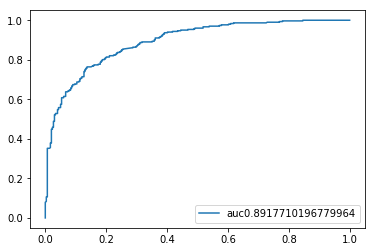

accuracy train=  0.89125  accuracy test =  0.8


/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Tfidfvectorizer, LDA


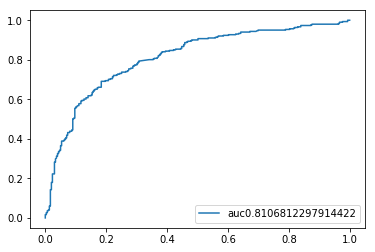

accuracy train=  0.92375  accuracy test =  0.7416666666666667


/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Tfidfvectorizer, QDA


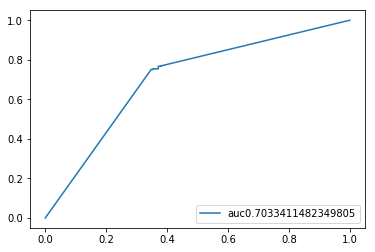

accuracy train=  0.925  accuracy test =  0.7
Tfidfvectorizer, Neighbors


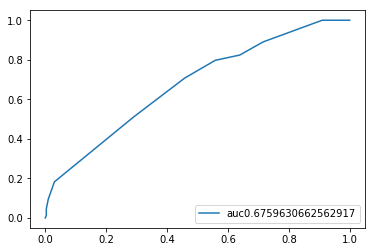

accuracy train=  0.6520833333333333  accuracy test =  0.625


/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Tfidfvectorizer, Voting Hard
accuracy train=  0.9370833333333334  accuracy test =  0.7466666666666667


/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Tfidfvectorizer, Voting soft


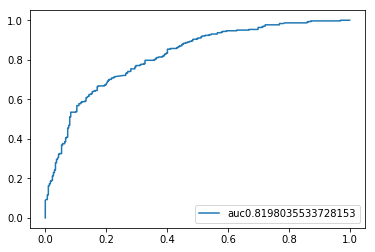

accuracy train=  0.93625  accuracy test =  0.7316666666666667


/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

Tfidfvectorizer, Bagging with LDA


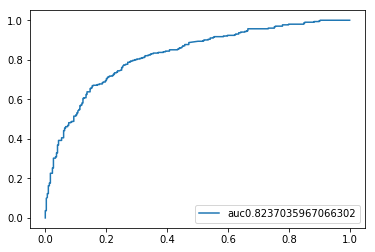

accuracy train=  0.9320833333333334  accuracy test =  0.7516666666666667


/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wk/a

Tfidfvectorizer, Bagging with QDA


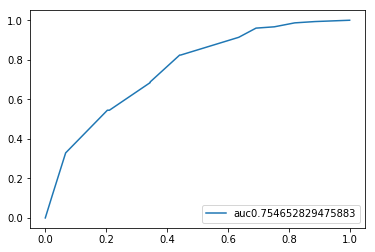

accuracy train=  0.9179166666666667  accuracy test =  0.69
Tfidfvectorizer, AdaBoost


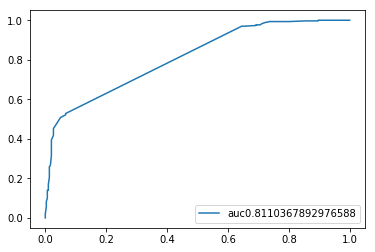

accuracy train=  0.7458333333333333  accuracy test =  0.7283333333333334
Tfidfvectorizer, AdaBoost based RandomForest


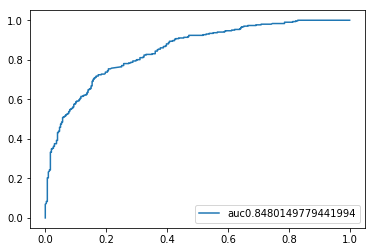

accuracy train=  0.98  accuracy test =  0.77
Tfidfvectorizer, XGBoost


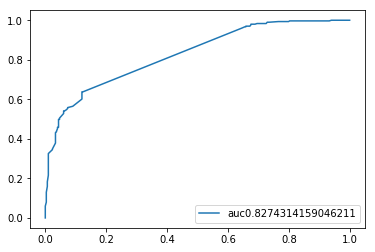

accuracy train=  0.7475  accuracy test =  0.7383333333333333
Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 11.3min finished


Tfidfvectorizer, GridSearch
Best parameters found= {'max_depth': 9, 'reg_alpha': 1, 'reg_lambda': 0.1}
Best Accuracy= 0.73875


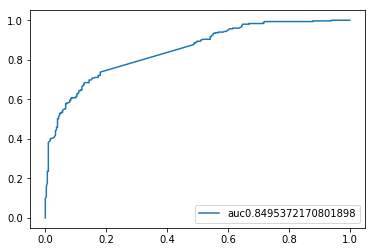

accuracy train=  0.8133333333333334  accuracy test =  0.7683333333333333


/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Tfidfvectorizer dimensions reduction PCA


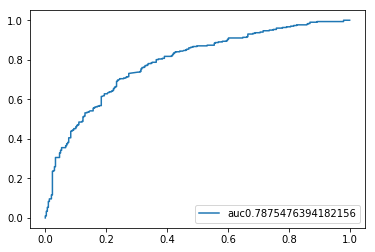

accuracy train=  0.94875  accuracy test =  0.7233333333333334


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

tfidf = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_array = tfidf.fit_transform(dftweets['tweet7'])


xtrain, xtest, ytrain, ytest = train_test_split(tfidf_array, dftweets['sentiment'], random_state=42, test_size=0.2)
X_train = xtrain.toarray()
y_train = ytrain.values
X_test = xtest.toarray()
y_test = ytest.values


# Logistic Regression

logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)

y_pred = logreg1.predict (X_test)

y_pred_proba = logreg1.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Tfidfvectorizer, Logistic')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(ytrain,logreg1.predict(xtrain))
accuracy_test = accuracy_score(ytest,logreg1.predict(xtest))
Tfidf_results ['Logistic regression'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis()
lda.fit (X_train,y_train)
y_pred = lda.predict (X_test)

y_pred_proba = lda.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Tfidfvectorizer, LDA')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()
# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,lda.predict(X_train))
accuracy_test = accuracy_score(y_test,lda.predict(X_test))
Tfidf_results ['LDA'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# QDA 

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit (X_train,y_train)
y_pred = qda.predict (X_test)


y_pred_proba = qda.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Tfidfvectorizer, QDA')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()
# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,qda.predict(X_train))
accuracy_test = accuracy_score(y_test,qda.predict(X_test))
Tfidf_results ['QDA'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)
               
# Neighbors

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=11)
knn.fit (X_train,y_train)
y_pred = knn.predict (X_test)

y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Tfidfvectorizer, Neighbors')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,knn.predict(X_train))
accuracy_test = accuracy_score(y_test,knn.predict(X_test))
Tfidf_results ['Neighbors'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# Voting hard

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = LinearDiscriminantAnalysis()
clf2= QuadraticDiscriminantAnalysis()
clf3= KNeighborsClassifier()

elcf1 = VotingClassifier(estimators = [('lda',clf1),('qda',clf2),('knn',clf3)],voting = 'hard') # hard - glosowanie wiekszosciowe
elcf1.fit (X_train,y_train)
    

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,elcf1.predict(X_train))
accuracy_test = accuracy_score(y_test,elcf1.predict(X_test))
print ('Tfidfvectorizer, Voting Hard')
Tfidf_results ['Voting hard'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# Voting soft

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

clf1 = LinearDiscriminantAnalysis()
clf2= QuadraticDiscriminantAnalysis()
clf3= KNeighborsClassifier()

elcf2 = VotingClassifier(estimators = [('lda',clf1),('qda',clf2),('knn',clf3)],voting = 'soft') 
elcf2.fit (X_train,y_train)
y_pred = elcf2.predict (X_test)

y_pred_proba = elcf2.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Tfidfvectorizer, Voting soft')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show() 


# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,elcf2.predict(X_train))
accuracy_test = accuracy_score(y_test,elcf2.predict(X_test))
Tfidf_results ['Votting soft'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# Bagging with LDA

from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
bagging = BaggingClassifier (LinearDiscriminantAnalysis(),random_state=1)
bagging.fit (X_train,y_train)
y_pred = bagging.predict (X_test)


y_pred_proba = bagging.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Tfidfvectorizer, Bagging with LDA')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,bagging.predict(X_train))
accuracy_test = accuracy_score(y_test,bagging.predict(X_test))
Tfidf_results ['Bagging with LDA'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# Bagging with QDA

from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
bagging = BaggingClassifier (QuadraticDiscriminantAnalysis(),random_state=1)
bagging.fit (X_train,y_train)
y_pred = bagging.predict (X_test)

y_pred_proba = bagging.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Tfidfvectorizer, Bagging with QDA')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,bagging.predict(X_train))
accuracy_test = accuracy_score(y_test,bagging.predict(X_test))
Tfidf_results ['Bagging with QDA'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# AdaBoost

from sklearn.ensemble import AdaBoostClassifier


clf = AdaBoostClassifier() # Bez parametru default - drzewo decyzyjne
clf.fit (X_train,y_train)
y_pred = clf.predict (X_test)

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Tfidfvectorizer, AdaBoost')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,clf.predict(X_train))
accuracy_test = accuracy_score(y_test,clf.predict(X_test))
Tfidf_results ['AdaBoost'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# AdaBoost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

clf = AdaBoostClassifier(base_estimator = RandomForestClassifier(n_estimators=20)) # wybieramy las losowy (X_train,y_train)
clf.fit (X_train,y_train)
y_pred = clf.predict (X_test)

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Tfidfvectorizer, AdaBoost based RandomForest')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,clf.predict(X_train))
accuracy_test = accuracy_score(y_test,clf.predict(X_test))
Tfidf_results ['Adaboost based RandomForest'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# XGBOOST

import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

xg_cl = xgb.XGBClassifier()
xg_cl.fit (X_train,y_train)
y_pred = xg_cl.predict (X_test)


y_pred_proba = xg_cl.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Tfidfvectorizer, XGBoost')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,xg_cl.predict(X_train))
accuracy_test = accuracy_score(y_test,xg_cl.predict(X_test))
Tfidf_results ['XGBoost'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# GridSearch

import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {'reg_lambda':(0.1,1,10),'reg_alpha':(0.01,0.1,1,10),'max_depth':(7,9,11)}
xg_grid = xgb.XGBClassifier(random_state = 1)
xg_grid_cv = GridSearchCV(estimator = xg_grid,param_grid = params,scoring = 'accuracy',cv=4,verbose=1,n_jobs=-1,refit = True)
xg_grid_cv.fit (X_train,y_train)
print ('Tfidfvectorizer, GridSearch')
print ('Best parameters found=',xg_grid_cv.best_params_)
print ('Best Accuracy=',xg_grid_cv.best_score_)

#xg_grid_cv.fit (X_train,y_train)
y_pred = xg_grid_cv.predict (X_test)


y_pred_proba = xg_grid_cv.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,xg_grid_cv.predict(X_train))
accuracy_test = accuracy_score(y_test,xg_grid_cv.predict(X_test))
Tfidf_results ['Xgboost - GridSearch'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA()
logreg = LogisticRegression()
pipeline = make_pipeline (scaler,pca,logreg)

pipeline.fit (X_train,y_train)
# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,pipeline.predict(X_train))
accuracy_test = accuracy_score(y_test,pipeline.predict(X_test))

y_pred_proba = pipeline.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
print ('Tfidfvectorizer dimensions reduction PCA')
auc = metrics.roc_auc_score (y_test, y_pred_proba)
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()


# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(ytrain,pipeline.predict(X_train))
accuracy_test = accuracy_score(ytest,pipeline.predict(X_test))
Tfidf_results ['PCA'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# CountVectorizer

/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Countvectorizer, Logistic


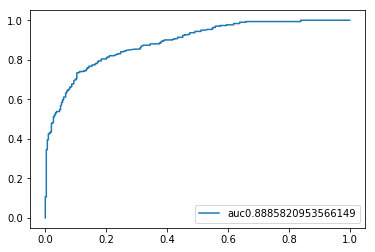

accuracy train=  0.89875  accuracy test =  0.8066666666666666


/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Countvectorizer, LDA


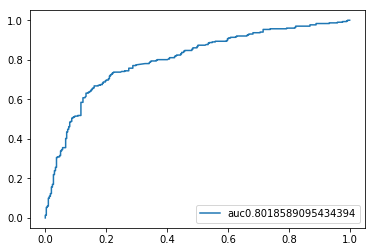

accuracy train=  0.9204166666666667  accuracy test =  0.74


/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Countvectorizer, QDA


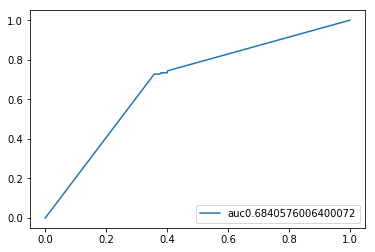

accuracy train=  0.9258333333333333  accuracy test =  0.6816666666666666
Countvectorizer, Neighbors


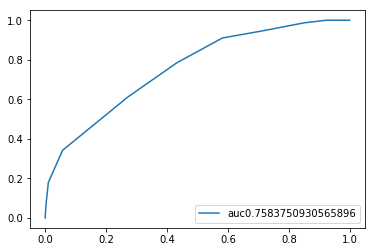

accuracy train=  0.7483333333333333  accuracy test =  0.6766666666666666


/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Countvectorizer, Voting Hard
accuracy train=  0.9375  accuracy test =  0.7633333333333333


/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Countvectorizer, Voting soft


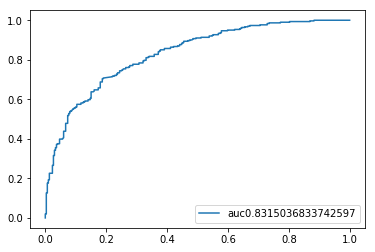

accuracy train=  0.9391666666666667  accuracy test =  0.7316666666666667


/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

Countvectorizer, Bagging with LDA


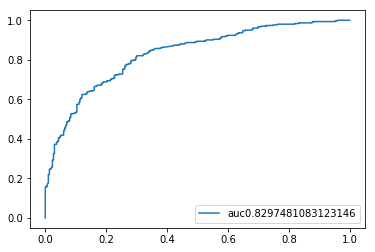

accuracy train=  0.9258333333333333  accuracy test =  0.7433333333333333


/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wk/a

Countvectorizer, Bagging with QDA


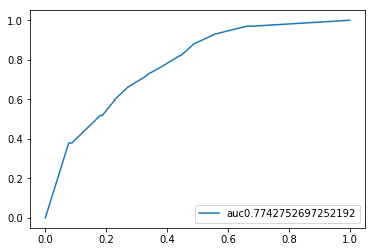

accuracy train=  0.9254166666666667  accuracy test =  0.695


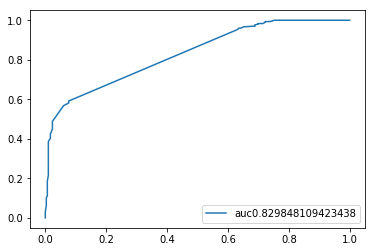

accuracy train=  0.7483333333333333  accuracy test =  0.7566666666666667
Countvectorizer, AdaBoost based RandomForest


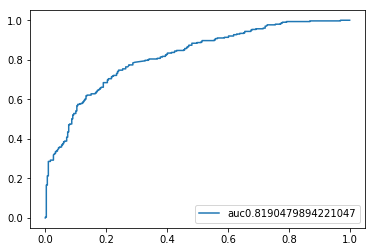

accuracy train=  0.98  accuracy test =  0.735
Countvectorizer, XGBoost


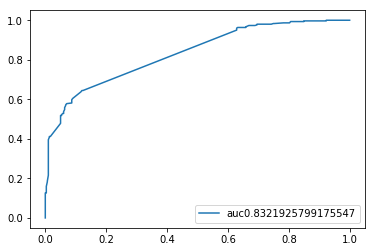

accuracy train=  0.7433333333333333  accuracy test =  0.75
Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 11.1min finished


Countvectorizer, GridSearch
Best parameters found= {'max_depth': 9, 'reg_alpha': 0.01, 'reg_lambda': 0.1}
Best Accuracy= 0.75


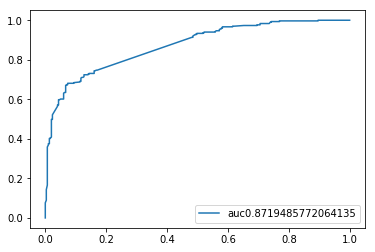

accuracy train=  0.8229166666666666  accuracy test =  0.795


/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 wa

Countvectorizer, dimensions reduction PCA


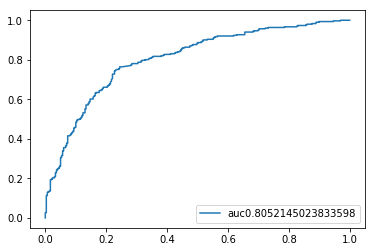

/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/wk/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


accuracy train=  0.9525  accuracy test =  0.7566666666666667


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt


countv = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
countv_array = countv.fit_transform(dftweets['tweet7'])


xtrain, xtest, ytrain, ytest = train_test_split(countv_array, dftweets['sentiment'], random_state=42, test_size=0.2)
X_train = xtrain.toarray()
y_train = ytrain.values
X_test = xtest.toarray()
y_test = ytest.values
# Logistic Regression

logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)

y_pred = logreg1.predict (X_test)

y_pred_proba = logreg1.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Countvectorizer, Logistic')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(ytrain,logreg1.predict(xtrain))
accuracy_test = accuracy_score(ytest,logreg1.predict(xtest))
Count_results ['Logistic regression'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis()
lda.fit (X_train,y_train)
y_pred = lda.predict (X_test)

y_pred_proba = lda.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Countvectorizer, LDA')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()
# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,lda.predict(X_train))
accuracy_test = accuracy_score(y_test,lda.predict(X_test))
Count_results ['LDA'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# QDA 

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit (X_train,y_train)
y_pred = qda.predict (X_test)


y_pred_proba = qda.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Countvectorizer, QDA')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()
# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,qda.predict(X_train))
accuracy_test = accuracy_score(y_test,qda.predict(X_test))
Count_results ['QDA'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)
               
# Neighbors

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=11)
knn.fit (X_train,y_train)
y_pred = knn.predict (X_test)

y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Countvectorizer, Neighbors')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,knn.predict(X_train))
accuracy_test = accuracy_score(y_test,knn.predict(X_test))
Count_results ['Neighbors'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# Voting hard

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = LinearDiscriminantAnalysis()
clf2= QuadraticDiscriminantAnalysis()
clf3= KNeighborsClassifier()

elcf1 = VotingClassifier(estimators = [('lda',clf1),('qda',clf2),('knn',clf3)],voting = 'hard') # hard - glosowanie wiekszosciowe
elcf1.fit (X_train,y_train)
    

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,elcf1.predict(X_train))
accuracy_test = accuracy_score(y_test,elcf1.predict(X_test))
print ('Countvectorizer, Voting Hard')
Count_results ['Voting hard'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# Voting soft

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

clf1 = LinearDiscriminantAnalysis()
clf2= QuadraticDiscriminantAnalysis()
clf3= KNeighborsClassifier()

elcf2 = VotingClassifier(estimators = [('lda',clf1),('qda',clf2),('knn',clf3)],voting = 'soft') 
elcf2.fit (X_train,y_train)
y_pred = elcf2.predict (X_test)

y_pred_proba = elcf2.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Countvectorizer, Voting soft')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show() 


# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,elcf2.predict(X_train))
accuracy_test = accuracy_score(y_test,elcf2.predict(X_test))
Count_results ['Votting soft'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# Bagging with LDA

from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
bagging = BaggingClassifier (LinearDiscriminantAnalysis(),random_state=1)
bagging.fit (X_train,y_train)
y_pred = bagging.predict (X_test)


y_pred_proba = bagging.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Countvectorizer, Bagging with LDA')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,bagging.predict(X_train))
accuracy_test = accuracy_score(y_test,bagging.predict(X_test))
Count_results ['Bagging with LDA'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# Bagging with QDA

from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
bagging = BaggingClassifier (QuadraticDiscriminantAnalysis(),random_state=1)
bagging.fit (X_train,y_train)
y_pred = bagging.predict (X_test)

y_pred_proba = bagging.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Countvectorizer, Bagging with QDA')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,bagging.predict(X_train))
accuracy_test = accuracy_score(y_test,bagging.predict(X_test))
Count_results ['Bagging with QDA'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# AdaBoost

from sklearn.ensemble import AdaBoostClassifier


clf = AdaBoostClassifier() # Bez parametru default - drzewo decyzyjne
clf.fit (X_train,y_train)
y_pred = clf.predict (X_test)

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,clf.predict(X_train))
accuracy_test = accuracy_score(y_test,clf.predict(X_test))
Count_results ['AdaBoost'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# AdaBoost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

clf = AdaBoostClassifier(base_estimator = RandomForestClassifier(n_estimators=20)) # wybieramy las losowy (X_train,y_train)
clf.fit (X_train,y_train)
y_pred = clf.predict (X_test)

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Countvectorizer, AdaBoost based RandomForest')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,clf.predict(X_train))
accuracy_test = accuracy_score(y_test,clf.predict(X_test))
Count_results ['Adaboost based RandomForest'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# XGBOOST

import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

xg_cl = xgb.XGBClassifier()
xg_cl.fit (X_train,y_train)
y_pred = xg_cl.predict (X_test)


y_pred_proba = xg_cl.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
print ('Countvectorizer, XGBoost')
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,xg_cl.predict(X_train))
accuracy_test = accuracy_score(y_test,xg_cl.predict(X_test))
Count_results ['XGBoost'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)

# GridSearch

import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {'reg_lambda':(0.1,1,10),'reg_alpha':(0.01,0.1,1,10),'max_depth':(7,9,11)}
xg_grid = xgb.XGBClassifier(random_state = 1)
xg_grid_cv = GridSearchCV(estimator = xg_grid,param_grid = params,scoring = 'accuracy',cv=4,verbose=1,n_jobs=-1,refit = True)
xg_grid_cv.fit (X_train,y_train)
print ('Countvectorizer, GridSearch')
print ('Best parameters found=',xg_grid_cv.best_params_)
print ('Best Accuracy=',xg_grid_cv.best_score_)

#xg_grid_cv.fit (X_train,y_train)
y_pred = xg_grid_cv.predict (X_test)


y_pred_proba = xg_grid_cv.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()

# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,xg_grid_cv.predict(X_train))
accuracy_test = accuracy_score(y_test,xg_grid_cv.predict(X_test))
Count_results ['Xgboost - GridSearch'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA()
logreg = LogisticRegression()
pipeline = make_pipeline (scaler,pca,logreg)

pipeline.fit (X_train,y_train)
# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(y_train,pipeline.predict(X_train))
accuracy_test = accuracy_score(y_test,pipeline.predict(X_test))

y_pred_proba = pipeline.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
print ('Countvectorizer, dimensions reduction PCA')
auc = metrics.roc_auc_score (y_test, y_pred_proba)
plt.plot (fpr,tpr,label='auc'+str(auc))
plt.legend(loc=4)
plt.show()


# sprawdzenie dokladnosci (accuracy)
accuracy_train = accuracy_score(ytrain,pipeline.predict(X_train))
accuracy_test = accuracy_score(ytest,pipeline.predict(X_test))
Count_results ['PCA'] = [accuracy_train, accuracy_test]
print ('accuracy train= ', accuracy_train,' accuracy test = ', accuracy_test)


# print results

In [56]:
print ('{:>45}{:>16}'.format('Tfidfvectorizer','Countvectorizer'))
print ('{:>35}{:>6}{:>10}{:>6}'.format('train','test','train','test'))
for key,el in results['Tfidf'].items():
    print ('{:28}  {:1.3f}  {:1.3f}    {:1.3f}  {:1.3f}'.format(
           key, el[0],el[1],results['Count'][key][0],results['Count'][key][1]))


                              Tfidfvectorizer Countvectorizer
                              train  test     train  test
Logistic regression           0.891  0.800    0.899  0.807
LDA                           0.924  0.742    0.920  0.740
QDA                           0.925  0.700    0.926  0.682
Neighbors                     0.652  0.625    0.748  0.677
Voting hard                   0.937  0.747    0.938  0.763
Votting soft                  0.936  0.732    0.939  0.732
Bagging with LDA              0.932  0.752    0.926  0.743
Bagging with QDA              0.918  0.690    0.925  0.695
AdaBoost                      0.746  0.728    0.748  0.757
Adaboost based RandomForest   0.980  0.770    0.980  0.735
XGBoost                       0.748  0.738    0.743  0.750
Xgboost - GridSearch          0.813  0.768    0.823  0.795
PCA                           0.949  0.723    0.953  0.757
